In [1]:
import os

os.sys.path.append(os.path.join(os.getcwd(), "../.."))

In [2]:
import matplotlib.pyplot as plt
from databases.connector import Connector
from models.ExportFormat import ExportFormat

In [3]:
connector = Connector(ExportFormat.JSON)

In [4]:
# For better results, first run the `count_themes_total_questions.py` script

themes = connector.client.get_themes_by_level(3)

total = 0
theme_count = {}
for theme in themes:
	theme_count[theme["name"]] = theme["total"]
	total += theme["total"]

theme_count_sorted = dict(sorted(theme_count.items(), key=lambda item: item[1]))

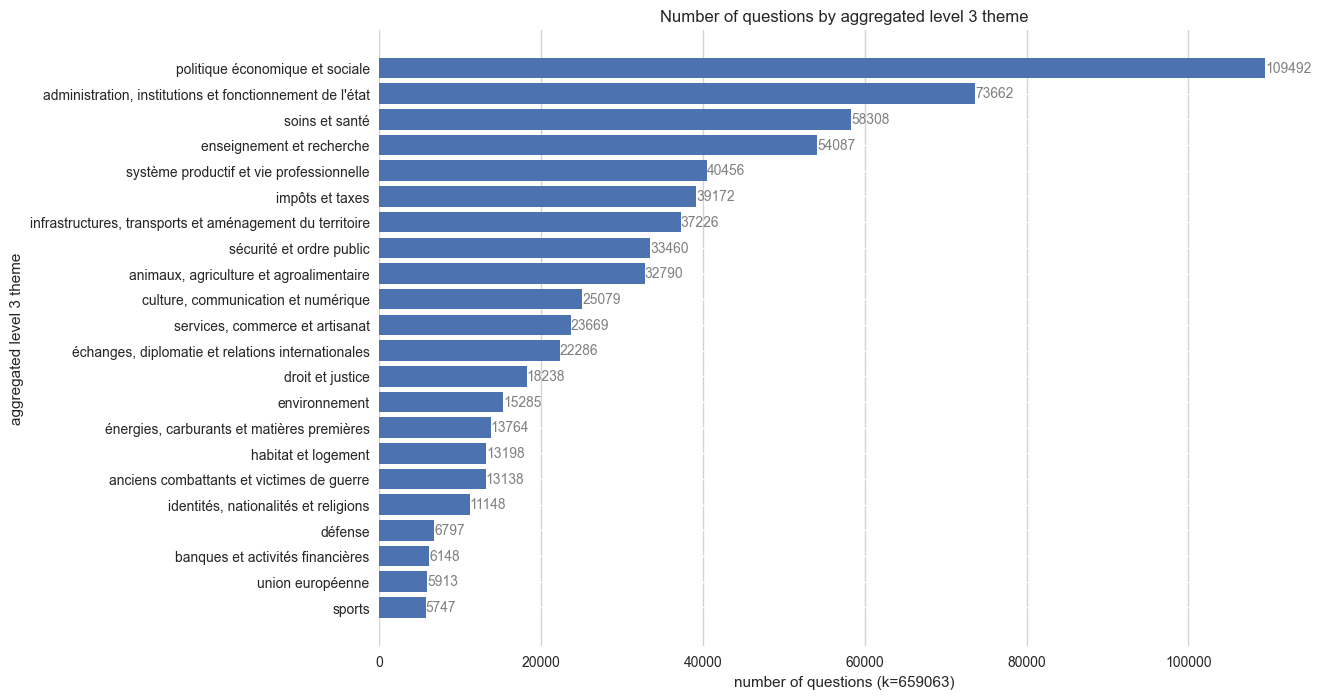

In [5]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 8))
plt.gca().set_facecolor((1.0, 1.0, 1.0))
plt.title('Number of questions by aggregated level 3 theme')
plt.ylabel('aggregated level 3 theme')
plt.xlabel(f'number of questions (k={total})')
plt.grid(axis="x", color="lightgrey")

bars = plt.barh(theme_count_sorted.keys(), theme_count_sorted.values())

for bar in bars:
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{int(bar.get_width())}',
        va='center',
        ha='left',
		fontsize=10,
		color="grey"
    )

plt.show()